<div><img src="autoCV_logo.png" width="220" ALIGN="left" border="20"></div>
<center><font color="4466ff"> <h1>AutoCV Challenge Tutorial </h1> </font></center>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS".
UNIVERSITE PARIS SUD, INRIA, CHALEARN, AND/OR OTHER ORGANIZERS
OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES.

# Before we start, you need to know that

* We target applications of multi-label image classification. 
* Raw data are provided, in TF record format.  
* We impose restrictions on training time and resources to push the state-of-the-art further.
* This notebook uses sample data. Download larger datasets from the website of the challenge.

In [90]:
from os.path import join

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
inges_dir = 'AutoDL_ingestion_program/'           # Codalab backend
score_dir = 'AutoDL_scoring_program/'             # Scoring program 
model_dir = 'AutoDL_sample_code_submission/'      # Where model code is, called model.py
baseline_dir = 'AutoDL_simple_baseline_models/'   # some baseline methods are implemented here

output_dir = 'AutoDL_scoring_output'
detailed_results_page = join(output_dir, 'detailed_results.html')

from sys import path; 
path.append(model_dir); path.append(inges_dir); path.append(score_dir); path.append(baseline_dir);

# Part 1: Dataset Overview

<font color='red'>Let's start with a sample dataset miniciao, which can be found in <code>./AutoDL_sample_data/miniciao</code>

In [75]:
data_dir = 'AutoDL_sample_data'            # Change this directory and the dataset as needed
data_name = 'miniciao'
!ls $data_dir

Monkeys  miniciao


In [108]:
# read train / test datasets
from dataset import AutoDLDataset
D_train = AutoDLDataset(join(data_dir, data_name + '/' + data_name + '.data', "train"))
D_test = AutoDLDataset(join(data_dir, data_name + '/' + data_name + '.data', "test"))

In [109]:
# show important meta information about the dataset
print ("Dataset path: ", D_train.get_metadata().get_dataset_name())
print ("Image shape: ",  D_train.get_metadata().get_tensor_size(0))
print ("Dataset size: ", D_train.get_metadata().size())
print ("Output size: ",  D_train.get_metadata().get_output_size())
print ("Class labels: ", D_train.get_class_labels())

Dataset path:  AutoDL_sample_data/miniciao/miniciao.data/train
Image shape:  (32, 32, 3)
Dataset size:  82
Output size:  10
Class labels:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


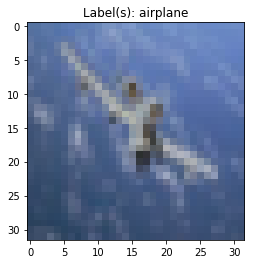

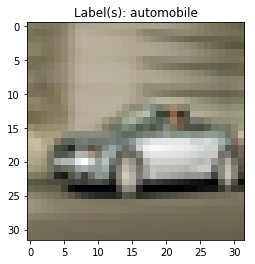

In [110]:
# show sample images
D_train.show_image(1);
D_train.show_image(11);

<font color='red'>
It should be noted that:
    
- in some datasets, the image shape is not fixed, i.e. some images are larger / smaller, when you get (-1, -1) as tensor size (image size) from meta information, it means that the image shapes are not identical in this dataset.
- not all datasets have 3 channels
- although this sample datset seems to have only one label for each image, it is not always true for other datsets.

Thus, it depends on you to choose to adapt to different datasets. 

# Part 2: Model, Prediction and Metrics

In [111]:
# copy simple model
model_simple = join(baseline_dir, 'linear', 'model.py') # choose one simple baseline model
model_submit = join(model_dir, 'model.py') # submitted models must be called model.py
!cp $model_simple $model_submit

In [112]:
# set time budget and instanciate the model with dataset
from model import Model
time_budget=200
M = Model(D_train.get_metadata())

MODEL INFO: 19-04-13 21:04:18 The dataset miniciao has 82 training examples and 10 classes.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/66/p9f_j7fj2s39n_lfskyb22sm0000gn/T/tmpz_lp2c0c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': , '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2dc5d710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [113]:
# train the model for a certain time
M.train(D_train.get_dataset(), remaining_time_budget=time_budget)

MODEL INFO: 19-04-13 21:04:30 Begin training for another 10 steps...
MODEL INFO: 19-04-13 21:04:30 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 21:04:30 Tensor shape after preprocessing: (1, 32, 32, 3)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/66/p9f_j7fj2s39n_lfskyb22sm0000gn/T/tmpz_lp2c0c/model.ckpt.
INFO:tensorflow:loss = 245.6724, step = 1
INFO:tensorflow:Saving checkpoints for 10 into /var/folders/66/p9f_j7fj2s39n_lfskyb22sm0000gn/T/tmpz_lp2c0c/model.ckpt.
INFO:tensorflow:Loss for final step: 123.134125.
MODEL INFO: 19-04-13 21:04:31 10 steps trained. 0.96 sec used. Now total steps trained: 10. Total time used for training: 0.96 sec. Current estimated time per step: 9.60e-02 sec.


In [114]:
# get prediction by calling test method
prediction = M.test(D_test.get_dataset(), remaining_time_budget=time_budget)

MODEL INFO: 19-04-13 21:04:40 Model already trained for 3.658536585365854 epochs.
MODEL INFO: 19-04-13 21:04:40 Begin testing... 
MODEL INFO: 19-04-13 21:04:40 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 21:04:40 Tensor shape after preprocessing: (1, 32, 32, 3)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/66/p9f_j7fj2s39n_lfskyb22sm0000gn/T/tmpz_lp2c0c/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
MODEL INFO: 19-04-13 21:04:40 Asserting predictions have the same number of columns...
MODEL INFO: 19-04-13 21:04:40 [+] Successfully made one prediction. 0.49 sec used. Total time used for testing: 0.49 sec. Current estimated time for test: 4.93e-01 sec.


<font color='red'> For each prediction made at a timestamp, we compute for each (binary) class the balanced accuracy (**BAC**), then normalize it (and average over all classes) by: 
\begin{equation*}
BAC = \frac{1}{2} (TPR + TNR), \quad NBAC = 2 \times BAC - 1,
\end{equation*}

where **TPR** and **TNR** stand for true positive rate and true negative rate, respectively. Then, the learning curve can be plot as a function of **NBAC** vs. time. The timestamps T are in **log scale**, such that the start time $T_0$ is at 0 and end time $T_{\text{max}}$ is at 1.  Then we compute **ALC** as follows:

\begin{equation*}
    ALC = \text{trapez}(T, NBAC),
\end{equation*}

where trapez method is used to compute the area under the curve formed by drawing straight lines between consecutive points. This gives the evaluation score used for one task. Later, when ALC score is computed for all tasks, the final score is obtained by the average rank (over all tasks). It should be emphasized that multi-class classification metrics are not being considered, i.e., each class is scored independently.

In [116]:
# calculate scores
from score import autodl_bac, accuracy
from libscores import read_array
solution_file = join(data_dir, data_name + '/' + data_name + '.solution')
solution = read_array(solution_file)

acc = accuracy(solution, prediction) # note that accuracy is not evaluation metric in the challenge
current_bac = autodl_bac(solution, prediction)
# print('Number of test examples: %d \n\t\t Solution \t\t\t\t\t Prediction ' % len(solution))
# [print(z) for z in zip(solution, prediction)]
print ("Classification Accuracy: ", acc)
print ("Normalized balanced accuracy (NBAC) = {:.4f}.".format(current_bac))
print ("ALC can be read from the result page as shown in the next part.")

Classification Accuracy:  0.06392973291480707
Normalized balanced accuracy (NBAC) = 0.1914.
ALC can be read from the result page as shown in the next part.


# Part 3: Test and Submission

<font color='red'>
    It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>AutoDL_sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [71]:
# run local test
!python run_local_test.py -code_dir=./AutoDL_sample_code_submission -dataset_dir=AutoDL_sample_data/miniciao

SCORING INFO: 19-04-13 20:09:07 Cleaning existing score_dir: /Users/zhen/Desktop/autodl_starting_kit_stable/AutoDL_scoring_output
SCORING INFO: 19-04-13 20:09:07 Start scoring program at Sat Apr 13 20:09:07 2019
INGESTION INFO: 19-04-13 20:09:09 Cleaning existing output_dir: /Users/zhen/Desktop/autodl_starting_kit_stable/AutoDL_sample_result_submission
INGESTION INFO: 19-04-13 20:09:09 ========== Ingestion program version 1 ==========
INGESTION INFO: 19-04-13 20:09:09 ************************************************
INGESTION INFO: 19-04-13 20:09:09 ******** Processing dataset Miniciao ********
INGESTION INFO: 19-04-13 20:09:09 ************************************************
INGESTION INFO: 19-04-13 20:09:09 Reading training set and test set...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
INGESTION INFO: 19-04-13 20:09:09 Creating model...
MODEL INFO: 19-04-13 

Instructions for updating:
Use standard file utilities to get mtimes.
SCORING INFO: 19-04-13 20:09:10 [+] New prediction found. Now number of predictions made = 1
SCORING INFO: 19-04-13 20:09:10 NBAC (2 * BAC - 1) of the latest prediction is 0.1817.
SCORING INFO: 19-04-13 20:09:10 Accuracy of the latest prediction is 0.0689.
SCORING INFO: 19-04-13 20:09:11 Current area under learning curve for miniciao: 0.1577
MODEL INFO: 19-04-13 20:09:11 2 steps trained. 0.80 sec used. Now total steps trained: 12. Total time used for training: 1.78 sec. Current estimated time per step: 1.48e-01 sec.
MODEL INFO: 19-04-13 20:09:11 Model already trained for 4.390243902439025 epochs.
MODEL INFO: 19-04-13 20:09:11 Begin testing... estimated time: 2.88e-01 sec.
MODEL INFO: 19-04-13 20:09:11 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:11 Tensor shape after preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:11 Asserting predictions have the same number of columns...
MOD

MODEL INFO: 19-04-13 20:09:12 Asserting predictions have the same number of columns...
MODEL INFO: 19-04-13 20:09:12 [+] Successfully made one prediction. 0.26 sec used. Total time used for testing: 0.81 sec. Current estimated time for test: 2.69e-01 sec.
INGESTION INFO: 19-04-13 20:09:12 [+] Prediction success, time spent so far  3.40 sec
INGESTION INFO: 19-04-13 20:09:12 [+] Time left 7196.60 sec
INGESTION INFO: 19-04-13 20:09:12 Training the model...
MODEL INFO: 19-04-13 20:09:12 Begin training for another 8 steps...estimated time for this: 1.29 sec.
MODEL INFO: 19-04-13 20:09:12 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:12 Tensor shape after preprocessing: (1, 32, 32, 3)
SCORING INFO: 19-04-13 20:09:12 [+] New prediction found. Now number of predictions made = 3
SCORING INFO: 19-04-13 20:09:12 NBAC (2 * BAC - 1) of the latest prediction is 0.1718.
SCORING INFO: 19-04-13 20:09:12 Accuracy of the latest prediction is 0.0749.
SCORING INFO: 19-04-13 2

MODEL INFO: 19-04-13 20:09:14 16 steps trained. 1.02 sec used. Now total steps trained: 40. Total time used for training: 4.46 sec. Current estimated time per step: 1.11e-01 sec.
MODEL INFO: 19-04-13 20:09:14 Model already trained for 14.634146341463415 epochs.
MODEL INFO: 19-04-13 20:09:14 Begin testing... estimated time: 2.73e-01 sec.
MODEL INFO: 19-04-13 20:09:14 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:14 Tensor shape after preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:15 Asserting predictions have the same number of columns...
MODEL INFO: 19-04-13 20:09:15 [+] Successfully made one prediction. 0.26 sec used. Total time used for testing: 1.35 sec. Current estimated time for test: 2.70e-01 sec.
INGESTION INFO: 19-04-13 20:09:15 [+] Prediction success, time spent so far  5.81 sec
INGESTION INFO: 19-04-13 20:09:15 [+] Time left 7194.19 sec
INGESTION INFO: 19-04-13 20:09:15 Training the model...
MODEL INFO: 19-04-13 20:09:15 Begin training

SCORING INFO: 19-04-13 20:09:16 [+] New prediction found. Now number of predictions made = 6
SCORING INFO: 19-04-13 20:09:16 NBAC (2 * BAC - 1) of the latest prediction is 0.1979.
SCORING INFO: 19-04-13 20:09:16 Accuracy of the latest prediction is 0.1096.
SCORING INFO: 19-04-13 20:09:16 Current area under learning curve for miniciao: 0.1695
MODEL INFO: 19-04-13 20:09:17 64 steps trained. 1.36 sec used. Now total steps trained: 136. Total time used for training: 6.86 sec. Current estimated time per step: 5.04e-02 sec.
MODEL INFO: 19-04-13 20:09:17 Model already trained for 49.75609756097561 epochs.
MODEL INFO: 19-04-13 20:09:17 Oops! Choose to stop early for next call!
MODEL INFO: 19-04-13 20:09:17 Begin testing... estimated time: 2.69e-01 sec.
MODEL INFO: 19-04-13 20:09:17 Tensor shape before preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:17 Tensor shape after preprocessing: (1, 32, 32, 3)
MODEL INFO: 19-04-13 20:09:18 Asserting predictions have the same number of columns...

In [117]:
# result report
from IPython.core.display import display, HTML

display(HTML(detailed_results_page))

In [118]:
# compress model to be submitted
from data_io import zipdir
sample_code_submission = 'mysubmission.zip'
zipdir(sample_code_submission, model_dir)
print("Submit this file: " + sample_code_submission)

Submit this file: mysubmission.zip


# Next steps

<font color='red'>
If you run the above cells successfully, congratulations! You are all set! In order to get better score on the challenge, you need to design your model carefully, that can learn better and faster on different datasets.

<font color='red'>
You don't need to write from scratch, but can instead follow our provided baseline model. Basically, you need to write three functions: (these functions can be found in <code>model.py</code>)

- <code>preprocess_tensor_4d</code> (optional) for preprocessing data, e.g. resize, change gray images to RGB images
- <code>input_function</code> (optional) for reading batchs
- <code>model_fn</code> (mandatory) for defining your own models, CNN, ResNet, Inception, etc.

For instructions on wrinting <code>model_fn</code>, you are invited to consult this page for reference: 
https://www.tensorflow.org/guide/custom_estimators#write_a_model_function

Good luck!